# Overview

A demo of using PCA to project higher dimensional data to 2D. This example uses 3D data for the higher dimensional data, but it can be extended to any dimension.

References:
1. [Dimensionality Reduction | Principal Component Analysis Algorithm — [ Andrew Ng ]](https://www.youtube.com/watch?v=rng04VJxUt4)
2. [Principal component analysis > Singular value decomposition](https://en.wikipedia.org/wiki/Principal_component_analysis#Singular_value_decomposition)

In [62]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

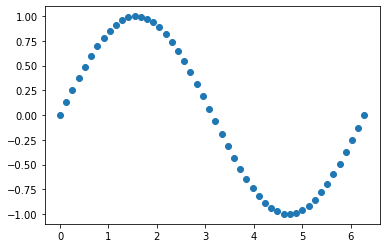

In [64]:
# Use sin(x) as the function we'll project 3D, and then try to recover.
x = np.linspace(0, 2 * math.pi)
y = np.sin(x)

plt.scatter(x, y)

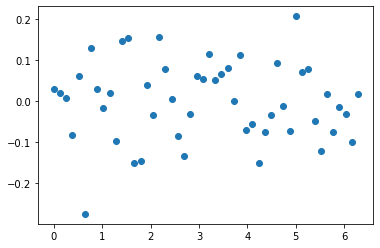

In [65]:
# Add noise in the Z dimension to make things interesting.
z = np.random.randn(len(x)) / 10

plt.scatter(x, z)

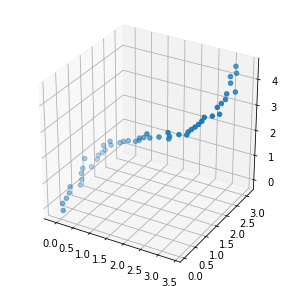

In [41]:
# Rotate the data so that a 2D projection isn't trivial.
X = np.concatenate((x.reshape(-1, 1), y.reshape(-1, 1), z.reshape(-1, 1)), axis=1)
theta_xy = math.pi / 4
theta_xz = math.pi / 4
rotation_xy = np.array([[math.cos(theta_xy), -math.sin(theta_xy), 0],
                        [math.sin(theta_xy),  math.cos(theta_xy), 0],
                        [                 0,                   0, 1]])
rotation_xz = np.array([[math.cos(theta_xz), 0, -math.sin(theta_xz)],
                        [                 0, 1,                   0],
                        [math.sin(theta_xz), 0,  math.cos(theta_xz)]])
rotation = rotation_xy @ rotation_xz
X = (rotation @ X.T).T

# https://stackoverflow.com/a/1986020
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

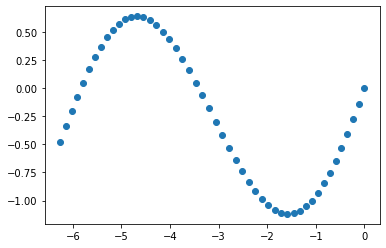

In [53]:
# Use covariance matrix and SVD project back into 2D.
covariance = X.T @ X
u, s, v = np.linalg.svd(covariance)
low_dim = u[:, :2].T @ X.T

plt.scatter(low_dim[0], low_dim[1])

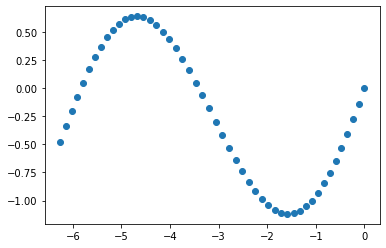

In [61]:
# Bypass the covariance matrix and compute the projection directly.
u, s, v = np.linalg.svd(X)
# This matmul can also be implemented as a broadcasted multiply since the RHS is diagonal.
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
low_dim = u[:, :2] @ np.diag(s[:2])

# Same as above, just reflected across the X axis.
plt.scatter(low_dim[:, 0], -low_dim[:, 1])